In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("BrentOilPrices.csv")
print(df)

              Date  Price
0        20-May-87  18.63
1        21-May-87  18.45
2        22-May-87  18.55
3        25-May-87  18.60
4        26-May-87  18.63
...            ...    ...
9006  Nov 08, 2022  96.85
9007  Nov 09, 2022  93.05
9008  Nov 10, 2022  94.25
9009  Nov 11, 2022  96.37
9010  Nov 14, 2022  93.59

[9011 rows x 2 columns]


In [36]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
price = df["Price"].to_numpy()
print(price)

[18.63 18.45 18.55 ... 94.25 96.37 93.59]


In [5]:
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df1 = df["Date"].to_numpy()
print(df1)

['1987-05-20T00:00:00.000000000' '1987-05-21T00:00:00.000000000'
 '1987-05-22T00:00:00.000000000' ... '2022-11-10T00:00:00.000000000'
 '2022-11-11T00:00:00.000000000' '2022-11-14T00:00:00.000000000']


In [7]:
df1.reshape(1,9011)

array([['1987-05-20T00:00:00.000000000', '1987-05-21T00:00:00.000000000',
        '1987-05-22T00:00:00.000000000', ...,
        '2022-11-10T00:00:00.000000000', '2022-11-11T00:00:00.000000000',
        '2022-11-14T00:00:00.000000000']], dtype='datetime64[ns]')

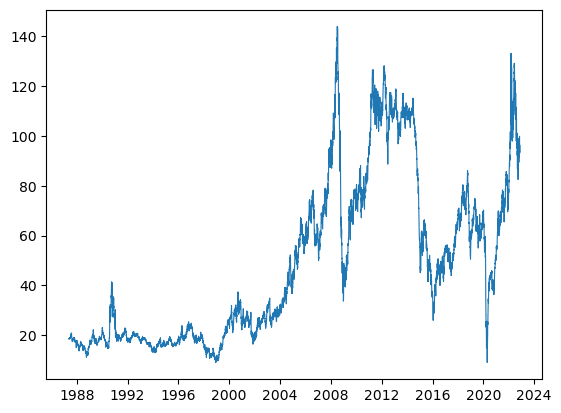

In [8]:
plt.plot(df1,price,markersize = 5, linewidth = 0.8)
plt.show()

In [9]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()

C:\Users\Hp\AppData\Local\Temp\ipykernel_16348\3825811760.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_mean = df.rolling(window = 12).mean()
C:\Users\Hp\AppData\Local\Temp\ipykernel_16348\3825811760.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_std = df.rolling(window = 12).std()


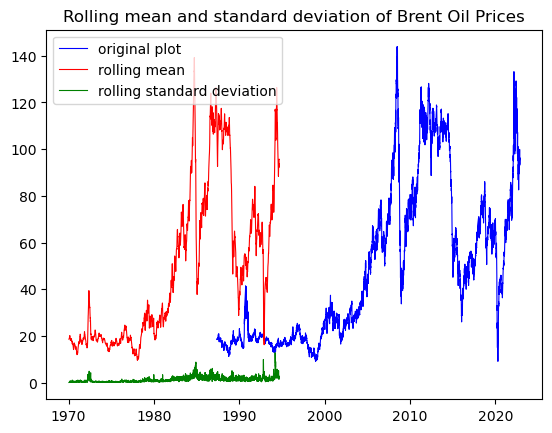

In [10]:
plt.plot(df1,price, color = "blue", label = "original plot",linewidth = 0.8)
plt.plot(rolling_mean, color = "red", label = "rolling mean",linewidth = 0.8)
plt.plot(rolling_std, color = "green", label = "rolling standard deviation",linewidth = 0.8)
plt.title("Rolling mean and standard deviation of Brent Oil Prices")
plt.legend(loc = "best")

In [11]:
result = adfuller(price)
print(result)

(-1.9938560113924657, 0.28927350489340364, 29, 8981, {'1%': -3.4310783342658615, '5%': -2.861861876398633, '10%': -2.566941329781918}, 28957.076110971866)


In [12]:
ADF_statistic = result[0]
p_value = result[1]
critical_values = result[4]

In [13]:
print(p_value)

0.28927350489340364


In [14]:
#p-value above threshold of 0.05 indicating non_stationarity of time series

In [15]:
print(critical_values)

{'1%': -3.4310783342658615, '5%': -2.861861876398633, '10%': -2.566941329781918}


Text(0.5, 1.0, 'Log of oil prices against time')

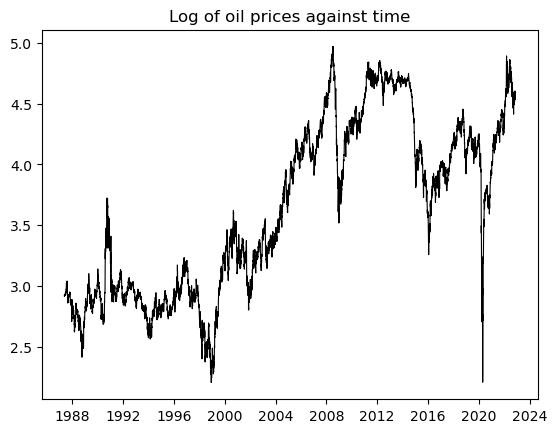

In [16]:
logprices = np.log(price)
plt.plot(df1,logprices,linewidth  = 0.8, color = "black")
plt.title("Log of oil prices against time")

In [25]:
decompose = seasonal_decompose(logprices, period = 12)

In [49]:
model = ARIMA(logprices,order = (2,1,3))

In [50]:
results = model.fit()

Text(0.5, 1.0, 'Timeseries plot of oil prices')

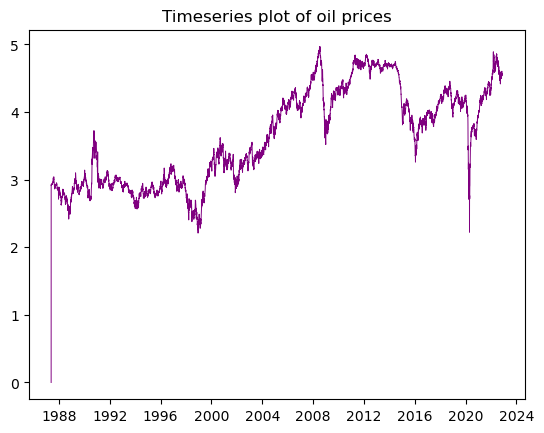

In [51]:
plt.plot(df1,results.fittedvalues, color = "purple",linewidth = 0.7)
plt.title("Timeseries plot of oil prices")